In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Διαβάζω το dataset από το drive μου

In [143]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/newsbomb.csv')

In [3]:
df.head()

,site,url,section,title,date,author,full_text,Media
0,newsbomb.gr,https://www.newsbomb.gr/ellada/story/1457679/p...,ΕΛΛΑΔΑ,Πυροβολισμοί σε κλαμπ στο κέντρο της Αθήνας,2023-08-12T12:32:02+03:00,Newsbomb,Newsbomb Πυροβολισμοί ακούστηκαν λίγο μετά τις...,True
1,newsbomb.gr,https://www.newsbomb.gr/ellada/story/1457675/k...,ΕΛΛΑΔΑ,Κιλκίς: Αλβανοί μπήκαν στη χώρα με σάκους που ...,2023-08-12T12:22:03+03:00,Newsbomb,Newsbomb Κιλκίς: Οι συλληφθέντες στην θέα των ...,False
2,newsbomb.gr,https://www.newsbomb.gr/ellada/story/1457674/a...,ΕΛΛΑΔΑ,Ασθενής αυτοκτόνησε στο Αττικόν Νοσοκομείο,2023-08-12T12:10:08+03:00,Newsbomb,Newsbomb Ένα απίστευτο περιστατικό έλαβε χώρα ...,False
3,newsbomb.gr,https://www.newsbomb.gr/ellada/story/1457673/n...,ΕΛΛΑΔΑ,Νέα Φιλαδέλφεια: Στον ανακριτή ο αδερφός του Μ...,2023-08-12T12:00:22+03:00,NaN,Σοφία Σπίγγου Την απόδοση Δικαιοσύνης για το θ...,True
4,newsbomb.gr,https://www.newsbomb.gr/ellada/astynomiko-repo...,ΑΣΤΥΝΟΜΙΚΟ,Πάτρα: Συνελήφθη 50χρονος κατηγορούμενος για α...,2023-08-12T11:49:07+03:00,Newsbomb,Newsbomb Πάτρα: Συνελήφθη 50χρονος κατηγορούμε...,False


Καθαρίζω τις στήλες title, full_text από na values

In [144]:
df = df.dropna(subset=['title'])
df = df.dropna(subset=['full_text'])

Συγχωνεύω τις στήλες 'title', 'full_text' σε μια στήλη text η οποία δηλαδή θα περιέχει το συνολικό κομμάτι κειμένου που περιέχεται σε κάθε άρθρο

In [145]:
df['text'] = df[['title', 'full_text']].agg('.'.join, axis=1)

Καθαρίζω τη νέα στήλη text από na values

In [146]:
df = df.dropna(subset=['text'])

Δημιουργώ ένα short version του dataframe το οποίο αποτελείται από τις ίδιες στήλες εκτός από τις στήλες url, section

In [147]:
short_df = df
short_df.drop(['url', 'section'], axis='columns', inplace=True)

Καθαρίζω τη στήλη 'text' από όλους τους χαρακτήρες αλλαγής γραμμής

In [148]:
short_df['text'] = short_df['text'].str.replace('/n', '')

In [149]:
short_df.head()

,site,title,date,author,full_text,Media,text
0,newsbomb.gr,Πυροβολισμοί σε κλαμπ στο κέντρο της Αθήνας,2023-08-12T12:32:02+03:00,Newsbomb,"Newsbomb Πυροβολισμοί ακούστηκαν λίγο μετά τις 05:00 τα ξημερώματα του Σαββάτου σε κλαμπ στο κέντρο της Αθήνας. Πυροβολισμοί έξω από κλαμπ στη Λεωφόρο Βουλιαγμένης 22, προκάλεσαν αναστάτωση και συναγερμό στην Αστυνομία. Το περιστατικό συνέβη στις 05.30 τα ξημερώματα και σύμφωνα με αυτόπτες μάρτυρες ένας άνδρας που βγήκε από το κλαμπ άρχισε να πυροβολεί με πιστόλι και στη συνέχεια διέφυγε με ΙΧ αυτοκίνητο. Στον τόπο του συμβάντος βρέθηκαν πέντε κάλυκες και τρεις οπές από σφαίρες στην ταμπέλα του καταστήματος. Οι αστυνομικοί που πήγαν στο σημείο, με βάση τις περιγραφές άρχισαν να αναζητούν το αυτοκίνητο και λίγο αργότερα το εντόπισαν σταθμευμένο στην συμβολή των οδών Θησέως και Ευριπίδου στην Καλλιθέα. Στο όχημα επέβαιναν ένας άνδρας και μια γυναίκα, οι οποίοι συνελήφθησαν, ενώ σε έρευνα που έγινε βρέθηκαν δύο πιστόλια. Προανάκριση για την υπόθεση διενεργεί η Υποδιεύθυνση Ασφάλεια Αθηνών. Δείτε το βίντεο της ΕΡΤ: Διαβάστε επίσης: Κιλκίς: Αλβανοί μπήκαν στη χώρα με σάκους που είχαν 38 κιλά χασίς Ασθενής αυτοκτόνησε στο Αττικόν Νοσοκομείο Νέα Φιλαδέλφεια: Στον ανακριτή ο αδερφός του Μιχάλη Κατσουρή - «Θέλω να αποδοθεί δικαιοσύνη»",True,"Πυροβολισμοί σε κλαμπ στο κέντρο της Αθήνας.Newsbomb Πυροβολισμοί ακούστηκαν λίγο μετά τις 05:00 τα ξημερώματα του Σαββάτου σε κλαμπ στο κέντρο της Αθήνας. Πυροβολισμοί έξω από κλαμπ στη Λεωφόρο Βουλιαγμένης 22, προκάλεσαν αναστάτωση και συναγερμό στην Αστυνομία. Το περιστατικό συνέβη στις 05.30 τα ξημερώματα και σύμφωνα με αυτόπτες μάρτυρες ένας άνδρας που βγήκε από το κλαμπ άρχισε να πυροβολεί με πιστόλι και στη συνέχεια διέφυγε με ΙΧ αυτοκίνητο. Στον τόπο του συμβάντος βρέθηκαν πέντε κάλυκες και τρεις οπές από σφαίρες στην ταμπέλα του καταστήματος. Οι αστυνομικοί που πήγαν στο σημείο, με βάση τις περιγραφές άρχισαν να αναζητούν το αυτοκίνητο και λίγο αργότερα το εντόπισαν σταθμευμένο στην συμβολή των οδών Θησέως και Ευριπίδου στην Καλλιθέα. Στο όχημα επέβαιναν ένας άνδρας και μια γυναίκα, οι οποίοι συνελήφθησαν, ενώ σε έρευνα που έγινε βρέθηκαν δύο πιστόλια. Προανάκριση για την υπόθεση διενεργεί η Υποδιεύθυνση Ασφάλεια Αθηνών. Δείτε το βίντεο της ΕΡΤ: Διαβάστε επίσης: Κιλκίς: Αλβανοί μπήκαν στη χώρα με σάκους που είχαν 38 κιλά χασίς Ασθενής αυτοκτόνησε στο Αττικόν Νοσοκομείο Νέα Φιλαδέλφεια: Στον ανακριτή ο αδερφός του Μιχάλη Κατσουρή - «Θέλω να αποδοθεί δικαιοσύνη»"
1,newsbomb.gr,Κιλκίς: Αλβανοί μπήκαν στη χώρα με σάκους που είχαν 38 κιλά χασίς,2023-08-12T12:22:03+03:00,Newsbomb,"Newsbomb Κιλκίς: Οι συλληφθέντες στην θέα των αστυνομικών απέρριψαν τους σάκους που μετέφεραν και τράπηκαν σε φυγή Στο πλαίσιο καταπολέμησης του διασυνοριακού εγκλήματος, από αστυνομικούς του Τμήματος Ασφάλειας Κιλκίς, συνελήφθησαν χθες τα ξημερώματα, δύο άνδρες από την Αλβανία ηλικίας 37 και 52 ετών, που προσπάθησαν να εισάγουν στη χώρα περισσότερα από 38 κιλά κάνναβης. Ειδικότερα, μετά από διακρατική συνεργασία των Διωκτικών Αρχών και συντονισμένων ενεργειών των αστυνομικών του Τμήματος Ασφάλειας Κιλκίς, εντοπίστηκαν οι προαναφερόμενοι άνδρες σε μεθοριακή περιοχή των Ευζώνων, στο Κιλκίς, να μεταφέρουν δύο σάκους, τους οποίους απέρριψαν στη θέα των αστυνομικών και τράπηκαν σε φυγή. Σε οργανωμένη επιχείρηση εντοπισμού τους, με τη συνδρομή και αστυνομικών του Τμήματος Συνοριακής Φύλαξης Παιονίας, οι δύο αλλοδαποί εντοπίστηκαν και συνελήφθησαν άμεσα. Μέσα στους παραπάνω σάκους που κατασχέθηκαν, διαπιστώθηκε ότι μετέφεραν 35 συσκευασίες με ποσότητες κάνναβης συνολικού βάρους 38 κιλών και 8 γραμμαρίων. Στην κατοχή τους βρέθηκαν και κατασχέθηκαν 3 κινητά τηλέφωνα και το χρηματικό ποσό των 230 ευρώ. Δείτε περισσότερες φωτογραφίες στην gallery που ακολουθεί: Οι συλληφθέντες, με τη δικογραφία που σχηματίσθηκε σε βάρος τους, οδηγήθηκαν στον Εισαγγελέα Πρωτοδικών Κιλκίς και τους παρέπεμψε στον Ανακριτή. Διαβάστε επίσης: Ασθενής αυτοκτόνησε στο Αττικόν Νοσοκομείο Πάτρα: Συνελήφθη 50χρονος κατη

In [79]:
import datetime as Datetime

In [124]:
pd.set_option('display.max_colwidth', None)

In [125]:
short_df['date'] = pd.to_datetime(short_df.date , format='%Y-%m-%d %H:%M')

In [12]:
import numpy as np

Εξάγω τη μέρα, μήνα, χρόνο, ώρα, λεπτά από τη στήλη date


In [126]:
short_df['Day'] = pd.DatetimeIndex(short_df['date']).day
short_df['Day'] = short_df['Day'].replace('nan', 0)
short_df['Month'] = pd.DatetimeIndex(short_df['date']).month
short_df['Year'] = pd.DatetimeIndex(short_df['date']).year
short_df['Hour'] = pd.DatetimeIndex(short_df['date']).hour
short_df['Minute'] = pd.DatetimeIndex(short_df['date']).minute

<Axes: title={'center': 'NEWSBOMB\n\nΑριθμός κειμένων ανά αρθρογράφο'}>

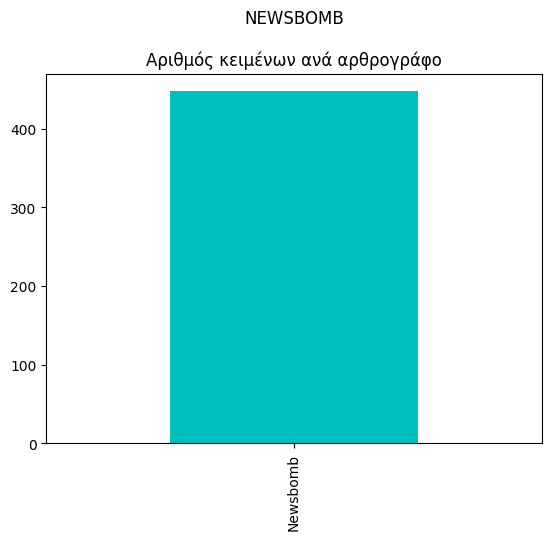

In [18]:
short_df['author'].value_counts().plot(kind='bar', title= 'NEWSBOMB\n\nΑριθμός κειμένων ανά αρθρογράφο', color = 'c')

Εξάγω τις λέξεις που περιλαμβάνουν **μόνο** κεφαλαία γράμματα από τη στήλη title

In [22]:
data = []

for row in short_df['title']:
  words = list(filter(lambda word: not any(char.isdigit()
                                         for char in word), row.split()))

  data.append(sum(word.isupper() for word in words))

short_df['upper_title'] = data

<Axes: title={'center': 'NEWSBOMB:\n\nΆθροισμα τίτλων ανά τον αριθμό από λέξεις με κεφαλαία γράμματα που περιέχουν'}>

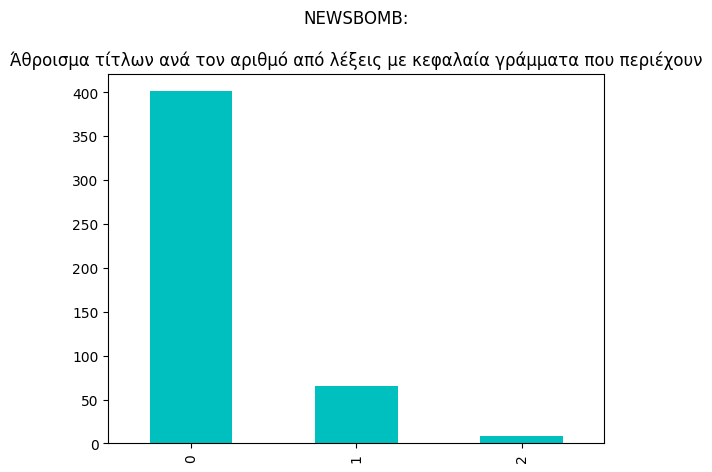

In [23]:
short_df['upper_title'].value_counts().plot(kind='bar', title='NEWSBOMB:\n\nΆθροισμα τίτλων ανά τον αριθμό από λέξεις με κεφαλαία γράμματα που περιέχουν', color='c')

Εξάγω τις λέξεις που περιλαμβάνουν **μόνο** κεφαλαία γράμματα από τη στήλη text

In [134]:
data = []

for row in short_df['text']:
  words = list(filter(lambda word: not any(char.isdigit()
                                         for char in word), row.split()))

  data.append(sum(word.isupper() for word in words))

short_df['upper_text'] = data

<Axes: title={'center': 'NEWSBOMB:\n\nΆθροισμα άρθρων με κεφαλαίες λέξεις ανά ημέρα'}>

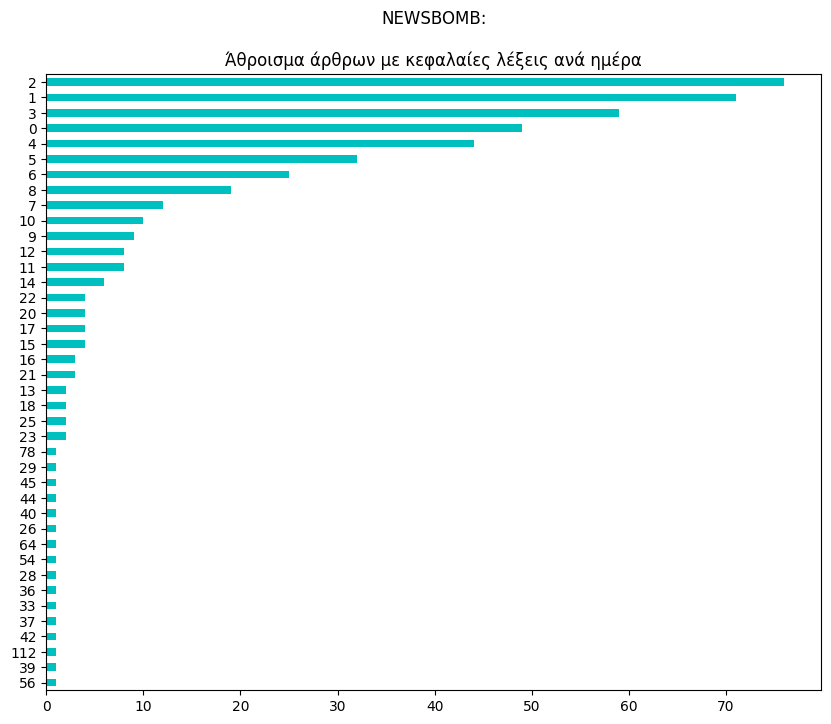

In [135]:
short_df['upper_text'].value_counts(ascending=True).plot(kind='barh',color = 'c', title= 'NEWSBOMB:\n\nΆθροισμα άρθρων με κεφαλαίες λέξεις ανά ημέρα', figsize=(10,8))

<Axes: title={'center': 'NEWSBOMB:\n\nΑριθμός άρθρων που περιέχουν μέσα'}>

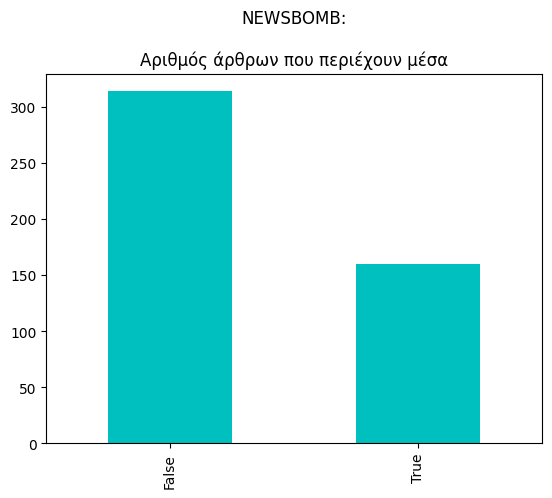

In [26]:
short_df['Media'].value_counts().plot(kind='bar',color = 'c', title= 'NEWSBOMB:\n\nΑριθμός άρθρων που περιέχουν μέσα')

<Axes: title={'center': 'NEWSBOMB:\n\nΑριθμός άρθρων που περιέχουν μέσα'}, ylabel='Media'>

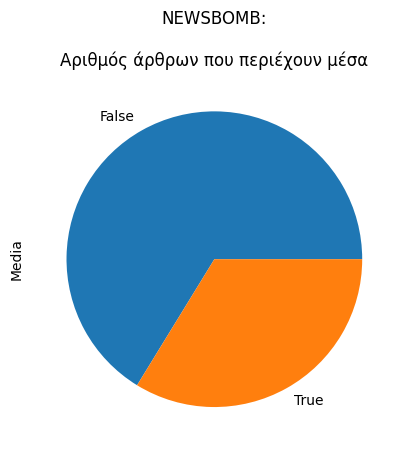

In [28]:
short_df['Media'].value_counts().plot(kind='pie', title = 'NEWSBOMB:\n\nΑριθμός άρθρων που περιέχουν μέσα')

In [29]:
import spacy

In [ ]:
# !python -m spacy download el_core_news_sm

In [31]:
nlp = spacy.load('el_core_news_sm')

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
from wordcloud import WordCloud, STOPWORDS
import spacy

In [34]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

In [35]:
results.sum(axis =0).sort_values(ascending = False)

νέα φιλαδέλφεια                379
μιχάλη κατσουρή                199
29χρονου μιχάλη                 88
πολιτικής προστασίας            74
ντιναμό ζάγκρεμπ                73
σύμφωνα πληροφορίες             62
μιχάλης κατσουρής               60
επεισόδια νέα                   57
γήπεδο αεκ                      56
κροάτες χούλιγκαν               55
δολοφονία 29χρονου              51
εγκληματική οργάνωση            48
newsbomb gr                     46
δολοφονία μιχάλη                46
000 ευρώ                        45
οδυσσέα σταμούλη                44
ελληνικής αστυνομίας            44
παρένθετες μητέρες              40
βράδυ δευτέρας                  39
υποβοηθούμενης αναπαραγωγής     39
dtype: int64

In [36]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

νέα φιλαδέλφεια         379
μιχάλη κατσουρή         199
29χρονου μιχάλη          88
πολιτικής προστασίας     74
ντιναμό ζάγκρεμπ         73
dtype: int64

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_df['text'])

results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

Παρουσιάζω τον βαθμό ομοιότητας των 10 πρώτων άρθρων

<Axes: title={'center': 'NEWSBOMB:\n\nΒαθμός ομοιότητας των 10 πρώτων άρθρων'}>

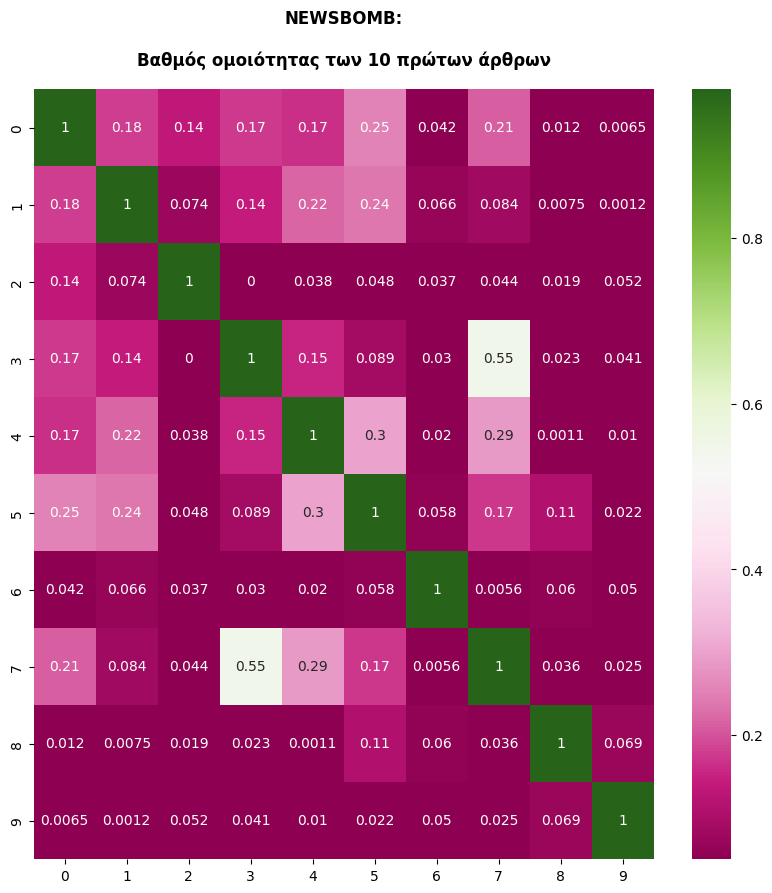

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.title('NEWSBOMB:\n\nΒαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG")

# Sentiment Analysis σε κείμενα

In [96]:
filepath ='https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv'

In [127]:
emolex_df = pd.read_csv(filepath)

emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [128]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
angry_words = emolex_df[emolex_df.Anger == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [129]:
matrix = vec.fit_transform(short_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

Προσθέτουμε σε νέο dataframe μια στήλη ανά συναίσθημα. Κάθε γραμμή της στήλης θα δείχνει το πόσες λέξεις που εκπροσωπούν το εκάστοτε συναίσθημα περιέχονται στο κείμενο του άρθρου

In [130]:
text_emot = short_df

text_emot['anger'] = wordcount_df[angry_words].sum(axis=1)
text_emot['positive'] = wordcount_df[positive_words].sum(axis=1)
text_emot['joy'] = wordcount_df[joy_words].sum(axis=1)
text_emot['disgust'] = wordcount_df[disgust_words].sum(axis=1)
text_emot['surprise'] = wordcount_df[surprise_words].sum(axis=1)
text_emot['trust'] = wordcount_df[trust_words].sum(axis=1)
text_emot['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
text_emot['sadness'] = wordcount_df[sadness_words].sum(axis=1)
text_emot['negative'] = wordcount_df[negative_words].sum(axis=1)
text_emot['fear'] = wordcount_df[fear_words].sum(axis=1)

text_emot.reset_index(inplace=True)
text_emot.set_index('date', inplace=True)

<Axes: title={'center': 'NEWSBOMB:\n\nΜέσος όρος λέξεων στο κέιμενο ανά ημέρα'}, xlabel='date'>

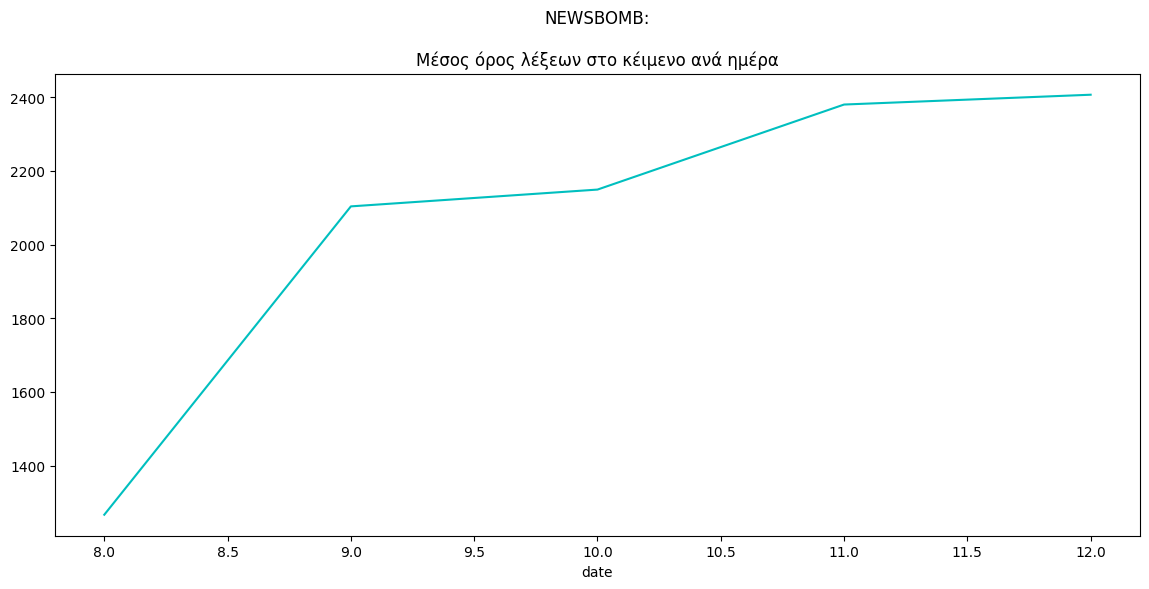

In [137]:
short_df['text'].str.len().groupby(by=short_df.index.day).mean().plot(color="c", title='NEWSBOMB:\n\nΜέσος όρος λέξεων στο κέιμενο ανά ημέρα',figsize=(14,6))

<Axes: title={'center': 'NEWSBOMB:\n\nΜέσος αριθμός λέξεων στο κέιμενο ανά ημέρα'}, xlabel='date'>

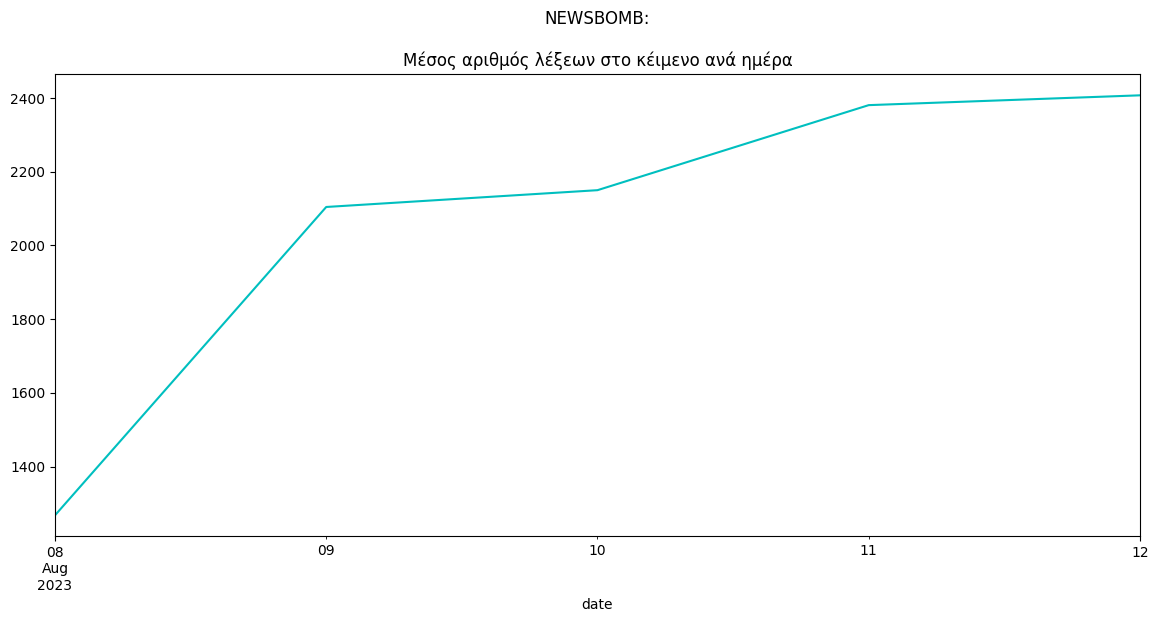

In [136]:
short_df['text'].str.len().resample('D').mean().plot(color="c",title= 'NEWSBOMB:\n\nΜέσος αριθμός λέξεων στο κέιμενο ανά ημέρα',figsize=(14,6))

<Axes: title={'center': 'NEWSBOMB:\n\nΜέσος αριθμός λέξεων στον τίτλο ανά ημέρα'}, xlabel='date'>

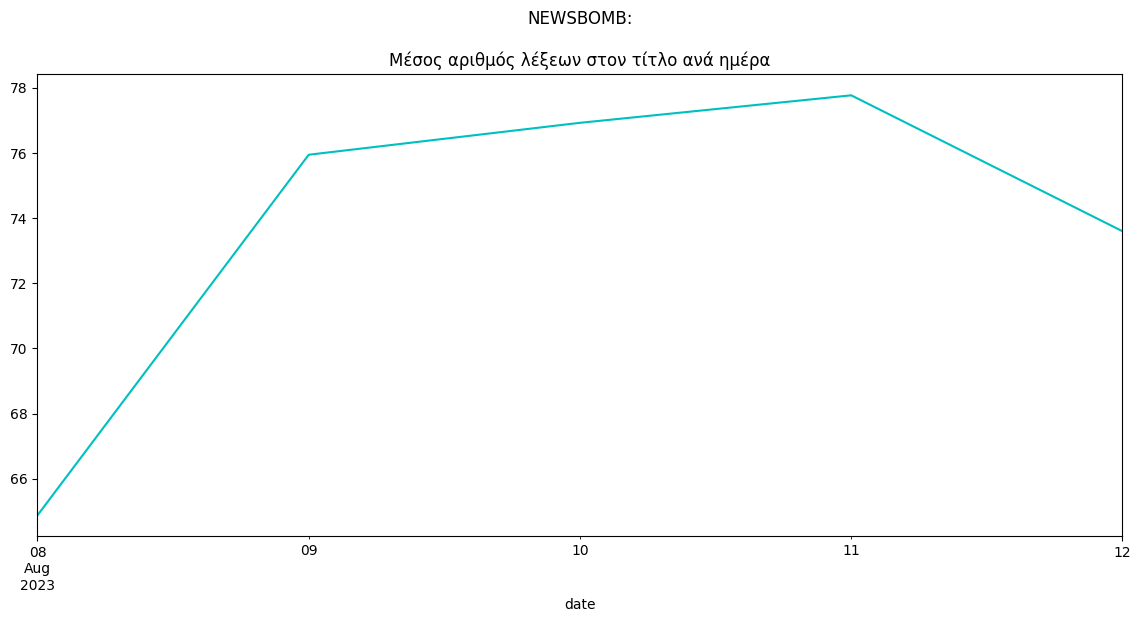

In [62]:
short_df['title'].str.len().resample('D').mean().plot(color="c", title='NEWSBOMB:\n\nΜέσος αριθμός λέξεων στον τίτλο ανά ημέρα',figsize=(14,6))

Παρουσιάζω στο ίδιο διάγραμμα το άθροισμα των λέξεων με συναίσθημα εκνευρισμού και ευτυχίας που δημοσιεύτηκαν σε άρθρα ανά ημέρα

<Axes: title={'center': 'NEWSBOMB:\n\nΆθροισμα λέξεων με συναίσθημα εκνευρισμού και ευτυχίας στο κείμενο ανά ημέρα'}, xlabel='date'>

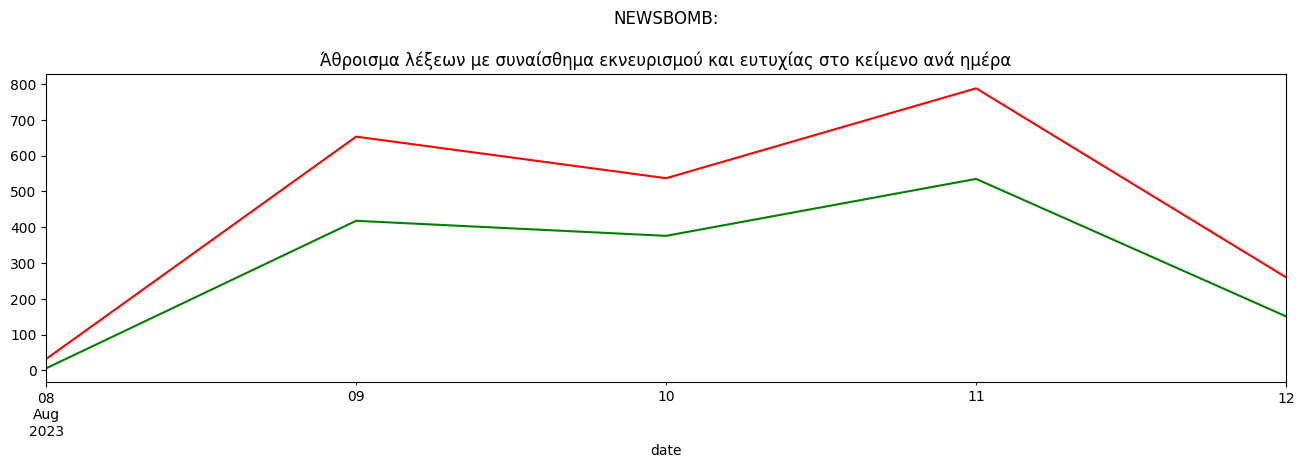

In [132]:
ax = text_emot['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
text_emot['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green',title= 'NEWSBOMB:\n\nΆθροισμα λέξεων με συναίσθημα εκνευρισμού και ευτυχίας στο κείμενο ανά ημέρα')

Παρουσιάζω στο ίδιο διάγραμμα το άθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε άρθρα ανά ημέρα

<Axes: title={'center': 'NEWSBOMB:\n\nΆθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε κείμενο ανά ημέρα'}, xlabel='date'>

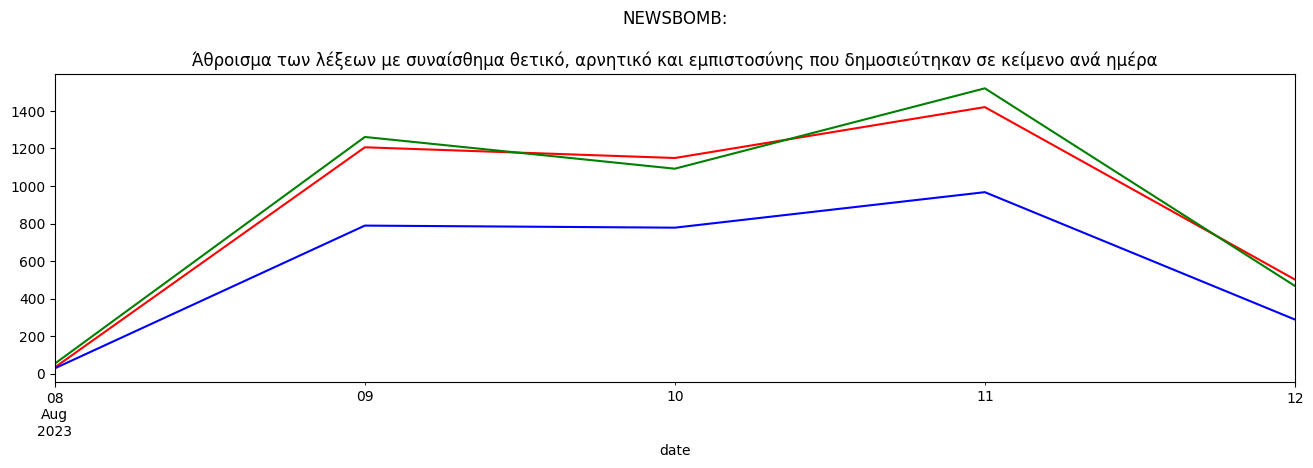

In [133]:
ax = text_emot['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
text_emot['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
text_emot['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue', title='NEWSBOMB:\n\nΆθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε κείμενο ανά ημέρα')

# Sentiment Analysis σε τίτλους

In [112]:
matrix = vec.fit_transform(short_df['title'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)

In [113]:
title_emot = short_df

title_emot['anger'] = wordcount_df[angry_words].sum(axis=1)
title_emot['positive'] = wordcount_df[positive_words].sum(axis=1)
title_emot['joy'] = wordcount_df[joy_words].sum(axis=1)
title_emot['disgust'] = wordcount_df[disgust_words].sum(axis=1)
title_emot['surprise'] = wordcount_df[surprise_words].sum(axis=1)
title_emot['trust'] = wordcount_df[trust_words].sum(axis=1)
title_emot['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
title_emot['sadness'] = wordcount_df[sadness_words].sum(axis=1)
title_emot['negative'] = wordcount_df[negative_words].sum(axis=1)
title_emot['fear'] = wordcount_df[fear_words].sum(axis=1)

In [114]:
title_emot.reset_index(inplace=True)
title_emot.set_index('date', inplace=True)

<Axes: title={'center': 'NEWSBOMB:\n\nΆθροισμα λέξεων με συναίσθημα εκνευρισμού και ευτυχίας σε τίτλο ανά ημέρα'}, xlabel='date'>

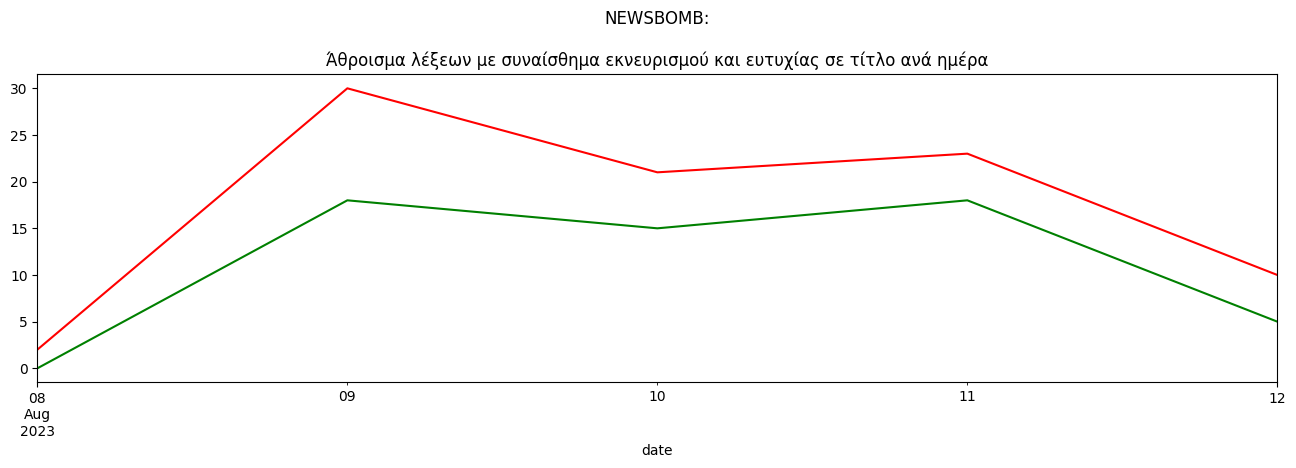

In [117]:
ax = title_emot['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
title_emot['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green',title= 'NEWSBOMB:\n\nΆθροισμα λέξεων με συναίσθημα εκνευρισμού και ευτυχίας σε τίτλο ανά ημέρα')

<Axes: title={'center': 'NEWSBOMB:\n\nΆθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε τίτλο ανά ημέρα'}, xlabel='date'>

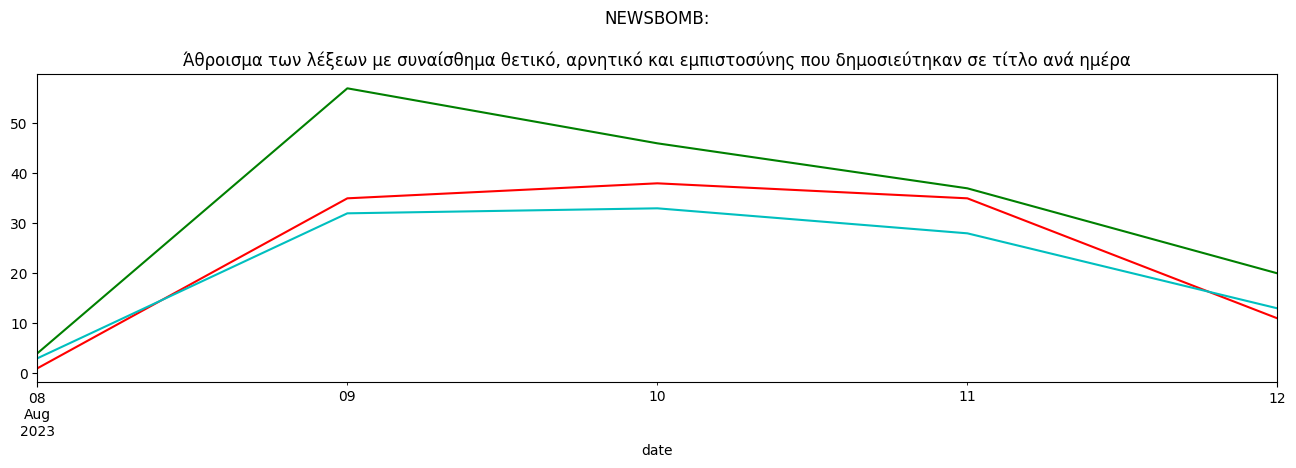

In [115]:
ax_title = title_emot['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
title_emot['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax_title, color = 'green')
title_emot['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax_title, color = 'c',title='NEWSBOMB:\n\nΆθροισμα των λέξεων με συναίσθημα θετικό, αρνητικό και εμπιστοσύνης που δημοσιεύτηκαν σε τίτλο ανά ημέρα')

Εξάγω τον αριθμό σημείων στίξης που περιέχονται στα κείμενα των άρθρων

In [138]:
import string

count = lambda l1,l2: sum([1 for x in l1 if x in l2])

data = []
for text in short_df['text']:

  words = text.split()

  count_punctuation = 0
  for word in words:
    count_punctuation += count(word,set(string.punctuation))

  data.append(count_punctuation)

short_df['punctuations_text'] = data

<Axes: title={'center': 'NEWSBOMB:\n\nΜέσος αριθμός σημείων στίξης στο κείμενο ανά ημέρα'}, xlabel='Day'>

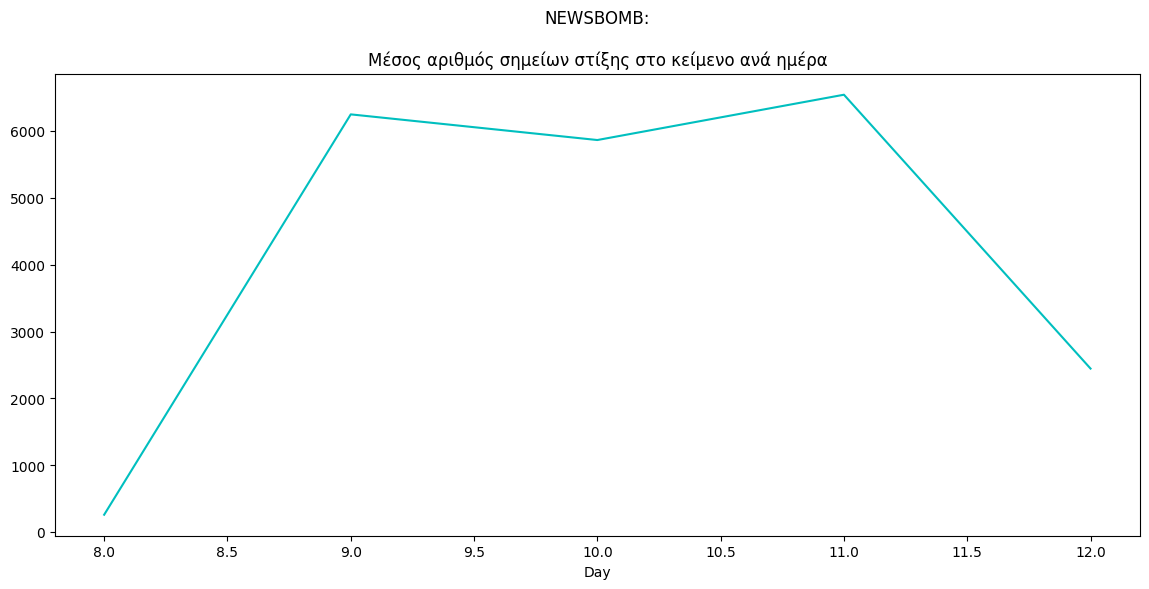

In [139]:
short_df['punctuations_text'].groupby(by=short_df.Day).sum().plot(color="c",title='NEWSBOMB:\n\nΜέσος αριθμός σημείων στίξης στο κείμενο ανά ημέρα',figsize=(14,6))

Εξάγω τον αριθμό σημείων στίξης που περιέχονται στους τίτλους των άρθρων

In [141]:
import string

count = lambda l1,l2: sum([1 for x in l1 if x in l2])

data = []

for row in short_df['title']:
  words = list(filter(lambda word: not any(char.isdigit()
                                         for char in word), row.split()))

  data.append(sum(count(word,set(string.punctuation)) for word in words))

short_df['punctuations_title'] = data

<Axes: title={'center': 'NEWSBOMB:\n\nΜέσος αριθμός σημείων στίξης στον τίτλο ανά ημέρα'}, xlabel='date'>

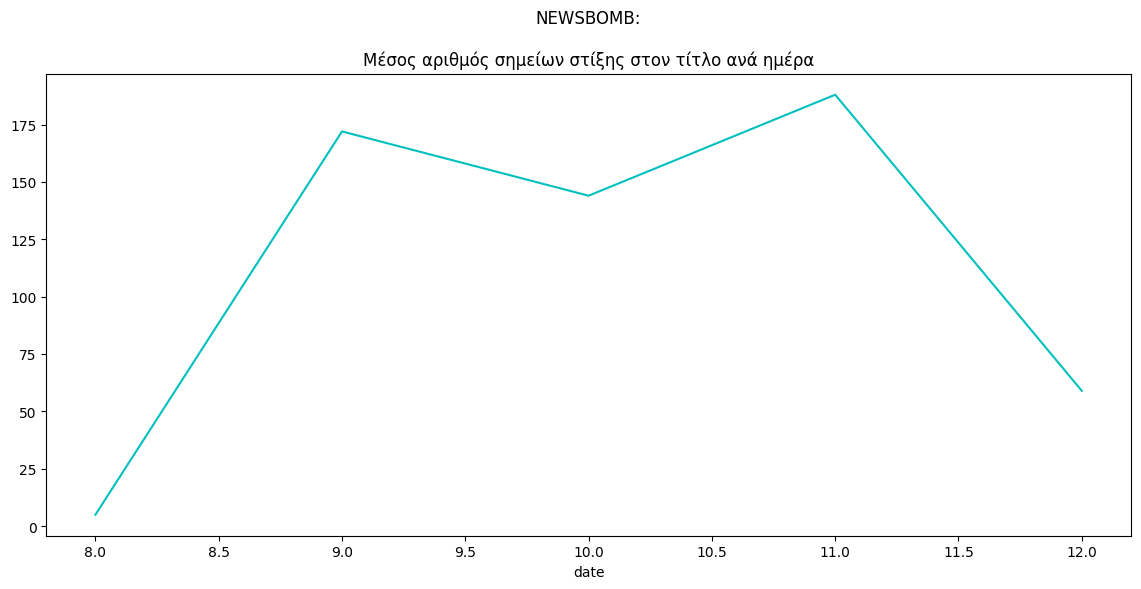

In [142]:
short_df['punctuations_title'].groupby(by=short_df.index.day).sum().plot(color="c",title='NEWSBOMB:\n\nΜέσος αριθμός σημείων στίξης στον τίτλο ανά ημέρα',figsize=(14,6))

In [ ]:
short_df.to_csv("drive/MyDrive/short_newsbomb.csv", index=False)